In [14]:
import matplotlib.pyplot as plt
import dateutil.parser as dp
%matplotlib inline
plt.rcParams['savefig.dpi'] = 144

In [15]:
import pandas as pd
import os
dir1 = r'/Users/walterkerr/metis/sf17_ds6/week1/Benson_Presentation/Benson_Challenges'
for files in os.walk(dir1):
    for file in files:
        print(file)
        #filenames += [file]

try:
    del turn
except:
    pass

filenames = ['turnstile_150704.txt', 'turnstile_150711.txt', 'turnstile_150718.txt', 'turnstile_150725.txt', 'turnstile_151003.txt', 'turnstile_151010.txt', 'turnstile_151017.txt', 'turnstile_151024.txt', 'turnstile_151031.txt', 'turnstile_160702.txt', 'turnstile_160709.txt', 'turnstile_160716.txt', 'turnstile_160723.txt', 'turnstile_160730.txt', 'turnstile_161001.txt', 'turnstile_161008.txt', 'turnstile_161015.txt', 'turnstile_161022.txt', 'turnstile_161029.txt']
for fn in filenames:
    temp = pd.read_csv(fn)
    try:
        turn = turn.append(temp)
    except:
        turn = temp.copy()
turn = turn.reset_index()
stationList = list(turn['STATION'].unique())
stationList_sorted = sorted(stationList)

In [16]:
turn.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,00:00:00,REGULAR,5203784,1759879
1,1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,04:00:00,REGULAR,5203840,1759886
2,2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,08:00:00,REGULAR,5203860,1759910
3,3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,12:00:00,REGULAR,5203987,1759995
4,4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,16:00:00,REGULAR,5204270,1760060


In [17]:
def ChooseTurnstile(station):
    a = turn.loc[turn["STATION"] == station]
    return a

In [18]:
def plotStations(summer, fall, station, yaxisV = 55000):
    
    plt.scatter(summer['day'], summer['summer exits'])
    plt.scatter(fall['day'], fall['fall exits'])
    plt.ylim(0, yaxisV)
    plt.xlabel('Day (Count Starting from 1st Monday of the Month)')
    plt.ylabel('Number of People Exiting')
    plt.title('Passenger Traffic At "{0:s}" Station in Summer and Fall'.format(station))
    plt.legend(('July 2016', 'October 2016'), loc = 'lower right')
    return plt.show()

In [19]:
def ExitStation(new_dogDay):
    #This creates dataframe but does not plot
    newNames = ['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time', 'desc', 'entries',
                'exits']
    
    new_dogDay.columns = newNames
    
    new_dogDay['corrected'] = new_dogDay.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    
    new_dogDay_exits = new_dogDay[['c/a', 'unit', 'scp', 'date', 'exits']]
    
    new_dogDay_exits['corrected'] = new_dogDay_exits.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    
    ndD = new_dogDay_exits[['date', 'corrected']]
    
    ndD_combined = ndD.groupby('date').sum()
    
    ndD = ndD_combined['corrected']
    ndD = ndD.reset_index()
    
    ndD['date'] = pd.to_datetime(ndD['date'])
    ndD.rename(columns = {'corrected' : 'exits'}, inplace = True)
    
    summer = (ndD['date'] > dp.parse('2016-07-03')) & (ndD['date'] <= dp.parse('2016-08-30'))
    fall = (ndD['date'] > dp.parse('2016-10-02')) & (ndD['date'] <= dp.parse('2016-12-30'))
    ndDj = ndD[summer]
    ndDo = ndD[fall]
    
    ndDj.rename(columns = {'exits' : 'summer exits'}, inplace = True)
    ndDo.rename(columns = {'exits' : 'fall exits'}, inplace = True)
    
    day = list(range(1, 27))
    ndDj['day'] = day
    ndDo['day'] = day
    
    return ndDj, ndDo
    

In [31]:
def ExitStationP(dogDay, V = 55000):
    #This creates the dataframe and plots
    new_dogDay = ChooseTurnstile(dogDay)
    
    newNames = ['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time', 'desc', 'entries',
                'exits']
    
    new_dogDay.columns = newNames
    
    new_dogDay['corrected'] = new_dogDay.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    
    new_dogDay_exits = new_dogDay[['c/a', 'unit', 'scp', 'date', 'exits']]
    
    new_dogDay_exits['corrected'] = new_dogDay_exits.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    
    ndD = new_dogDay_exits.loc[:, ('date', 'corrected')]
    
    ndD_combined = ndD.groupby('date').sum()
    
    ndD = ndD_combined['corrected']
    ndD = ndD.reset_index()
    
    ndD['date'] = pd.to_datetime(ndD['date'])
    ndD.rename(columns = {'corrected' : 'exits'}, inplace = True)
    
    summer = (ndD['date'] > dp.parse('2016-07-03')) & (ndD['date'] <= dp.parse('2016-08-30'))
    fall = (ndD['date'] > dp.parse('2016-10-02')) & (ndD['date'] <= dp.parse('2016-12-30'))
    ndDj = ndD[summer]
    ndDo = ndD[fall]
    
    ndDj.rename(columns = {'exits' : 'summer exits'}, inplace = True)
    ndDo.rename(columns = {'exits' : 'fall exits'}, inplace = True)
    
    day = list(range(1, 27))
    ndDj['day'] = day
    ndDo['day'] = day
    
    return plotStations(ndDj, ndDo, dogDay, V)


In [21]:
west4 = ChooseTurnstile('W 4 ST-WASH SQ')

In [22]:
west4.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
54222,54222,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,06/27/2015,01:00:00,REGULAR,391165,1048373
54223,54223,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,06/27/2015,05:00:00,REGULAR,391419,1048481
54224,54224,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,06/27/2015,09:00:00,REGULAR,391515,1048774
54225,54225,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,06/27/2015,13:00:00,REGULAR,391771,1049603
54226,54226,N080,R138,00-00-00,W 4 ST-WASH SQ,ABCDEFM,IND,06/27/2015,17:00:00,REGULAR,392243,1050670


In [23]:
west4July, west4Oct = ExitStation(west4)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [24]:
west4July.head()

,date,summer exits,day
17,2016-07-04,14866.0,1
19,2016-07-05,32646.0,2
21,2016-07-06,36533.0,3
23,2016-07-07,36133.0,4
25,2016-07-08,36917.0,5


In [25]:
west4Oct.head()

,date,fall exits,day
80,2016-10-03,34225.0,1
82,2016-10-04,36214.0,2
84,2016-10-05,39429.0,3
86,2016-10-06,40752.0,4
88,2016-10-07,40788.0,5


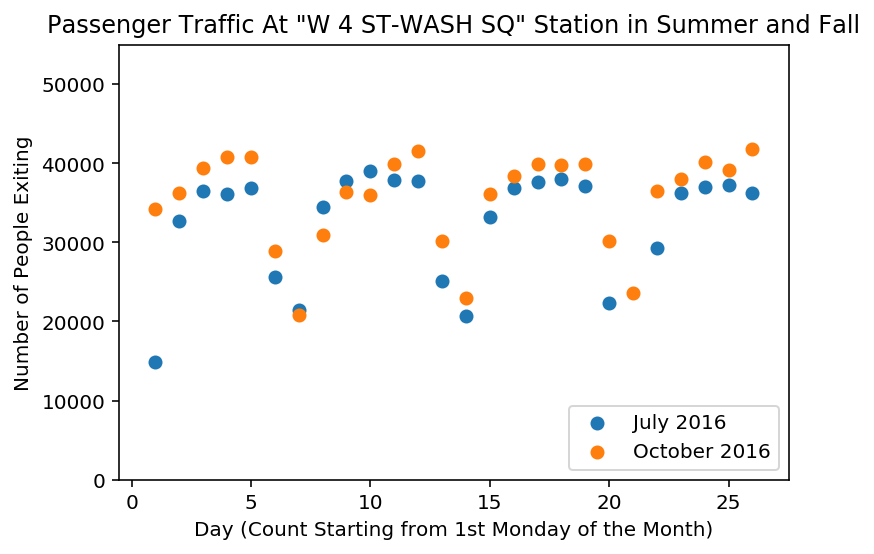

In [12]:
plotStations(west4July, west4Oct, 'W 4 ST-WASH SQ')

In [26]:
chambers = ChooseTurnstile('CHAMBERS ST')

In [27]:
chamJuly, chamOct = ExitStation(chambers)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [32]:
chamJuly.head()

,date,summer exits,day
17,2016-07-04,12944.0,1
19,2016-07-05,35712.0,2
21,2016-07-06,38444.0,3
23,2016-07-07,38485.0,4
25,2016-07-08,33978.0,5


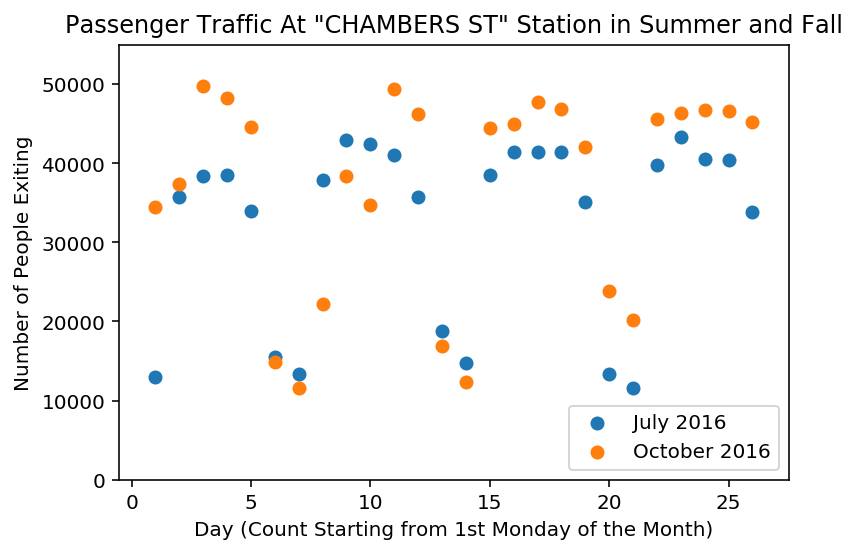

In [28]:
plotStations(chamJuly, chamOct, 'CHAMBERS ST')

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

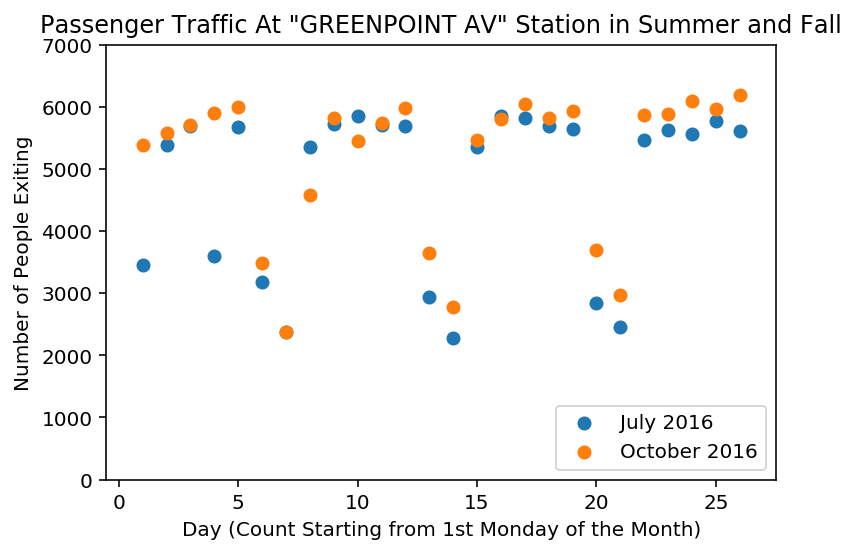

In [32]:
ExitStationP('GREENPOINT AV', 7000)

In [20]:
students = west4Oct['fall exits'].reset_index(drop=True) - west4July['summer exits'].reset_index(drop=True)

In [21]:
west4Oct['fall exits'].reset_index(drop=True)

0     34225.0
1     36214.0
2     39429.0
3     40752.0
4     40788.0
5     28939.0
6     20864.0
7     30921.0
8     36418.0
9     35982.0
10    39926.0
11    41529.0
12    30205.0
13    22934.0
14    36119.0
15    38364.0
16    39937.0
17    39835.0
18    39953.0
19    30134.0
20    23653.0
21    36510.0
22    38047.0
23    40190.0
24    39195.0
25    41843.0
Name: fall exits, dtype: float64

In [22]:
west4July['summer exits']

17        14866.0
19        32646.0
21        36533.0
23        36133.0
25        36917.0
27        25650.0
29        21427.0
31        34536.0
33        37777.0
35        38984.0
37        37907.0
39        37801.0
41        25172.0
43        20635.0
45        33228.0
47        36872.0
49        37640.0
51        38053.0
53        37141.0
55        22349.0
57   -763016395.0
58        29231.0
59        36251.0
60        37017.0
61        37315.0
62        36292.0
Name: summer exits, dtype: float64

In [23]:
day = list(range(1, 27))



In [24]:
turn.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,00:00:00,REGULAR,5203784,1759879
1,1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,04:00:00,REGULAR,5203840,1759886
2,2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,08:00:00,REGULAR,5203860,1759910
3,3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,12:00:00,REGULAR,5203987,1759995
4,4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/27/2015,16:00:00,REGULAR,5204270,1760060


In [25]:
stationList = list(turn['STATION'].unique())
stationList

['LEXINGTON AVE',
 '5 AVE-59 ST',
 '57 ST-7 AVE',
 '49 ST-7 AVE',
 '42 ST-TIMES SQ',
 '34 ST-HERALD SQ',
 '28 ST-BROADWAY',
 '23 ST-5 AVE',
 '14 ST-UNION SQ',
 "8 ST-B'WAY NYU",
 "PRINCE ST-B'WAY",
 'CANAL ST',
 'CITY HALL',
 'CORTLANDT ST',
 'RECTOR ST',
 'WHITEHALL ST',
 'ESSEX ST',
 'BOWERY',
 'CHAMBERS ST',
 'FULTON ST',
 'BROAD ST',
 '7 AVE',
 'PARK PLACE',
 'BOTANIC GARDEN',
 'PROSPECT PARK',
 'PARKSIDE AVE',
 'CHURCH AVE',
 'BEVERLEY ROAD',
 'CORTELYOU ROAD',
 'NEWKIRK PLAZA',
 'AVE H',
 'AVE J',
 'AVE M',
 'KINGS HIGHWAY',
 'AVE U',
 'NECK ROAD',
 'SHEEPSHEAD BAY',
 'BRIGHTON BEACH',
 'OCEAN PARKWAY',
 'BOROUGH HALL/CT',
 'JAY ST-METROTEC',
 'DEKALB AVE',
 'BARCLAYS CENTER',
 'UNION ST',
 '9 ST',
 'PROSPECT AVE',
 '25 ST',
 '36 ST',
 '45 ST',
 '53 ST',
 '59 ST',
 'BAY RIDGE AVE',
 '77 ST',
 '86 ST',
 'BAY RIDGE-95 ST',
 '8 AVE',
 'FT HAMILTON PKY',
 'NEW UTRECHT AVE',
 '18 AVE',
 '20 AVE',
 'BAY PKY-22 AVE',
 '9 AVE',
 '50 ST',
 '55 ST',
 '71 ST',
 '79 ST',
 'BAY PARKWAY',
 '25

In [26]:
stationList_sorted = sorted(stationList)

In [27]:
stationList_sorted

['1 AV',
 '1 AVE',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '110 ST-CATHEDRL',
 '110 ST-CPN',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST CITY COL',
 '137 ST-CITY COL',
 '138 ST-3 AVE',
 '138 ST-GR CONC',
 '138/GRAND CONC',
 '14 ST',
 '14 ST-6 AVE',
 '14 ST-UNION SQ',
 '145 ST',
 '148 ST-LENOX',
 '149 ST-3 AVE',
 '149 ST-GR CONC',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161 ST-YANKEE',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '168 ST-BROADWAY',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 AVE',
 '18 ST',
 '181 ST',
 '182-183 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '2 AVE',
 '20 AV',
 '20 AVE',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '22 AVE-BAY PKY',
 '225 ST',
 '23 ST',
 '23 ST-5 AVE',
 '23 ST-6 AVE',
 '231 ST',
 '233 ST',
 '238 ST',
 '242 ST',
 '25 AV',
 '25 AVE',
 '25 ST'

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

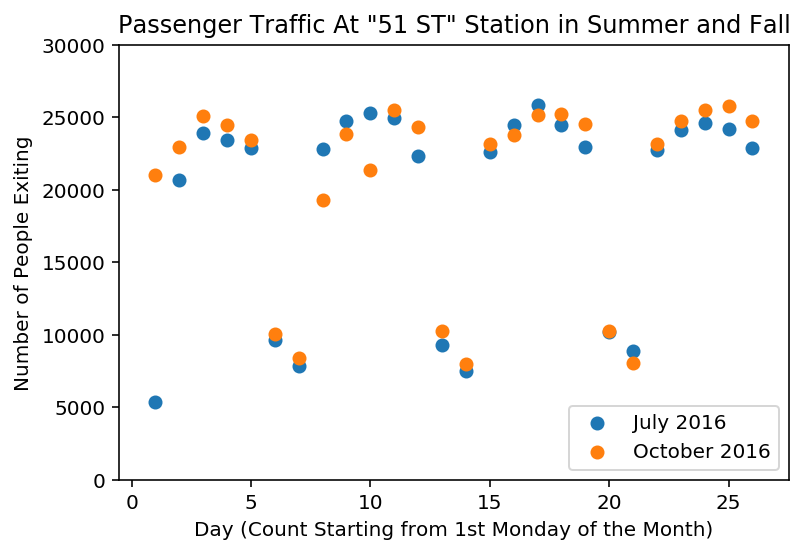

In [22]:
ExitStationP('51 ST', 30000)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

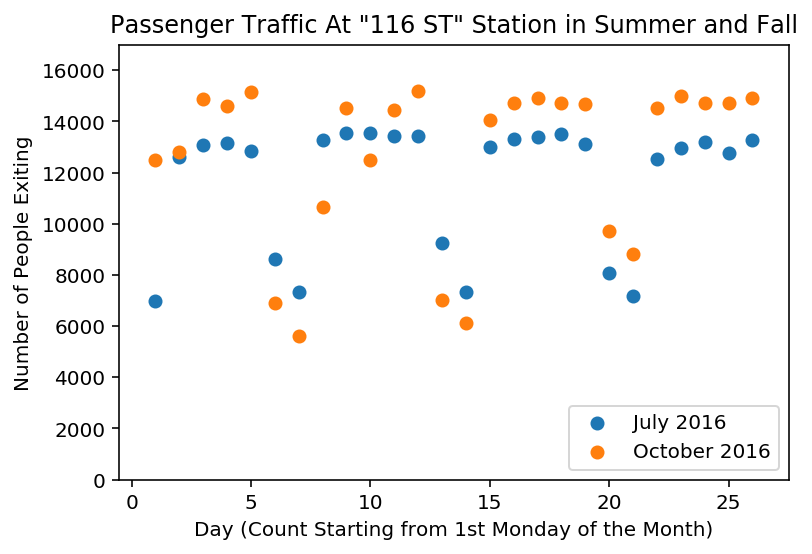

In [35]:
ExitStationP('116 ST', 17000)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

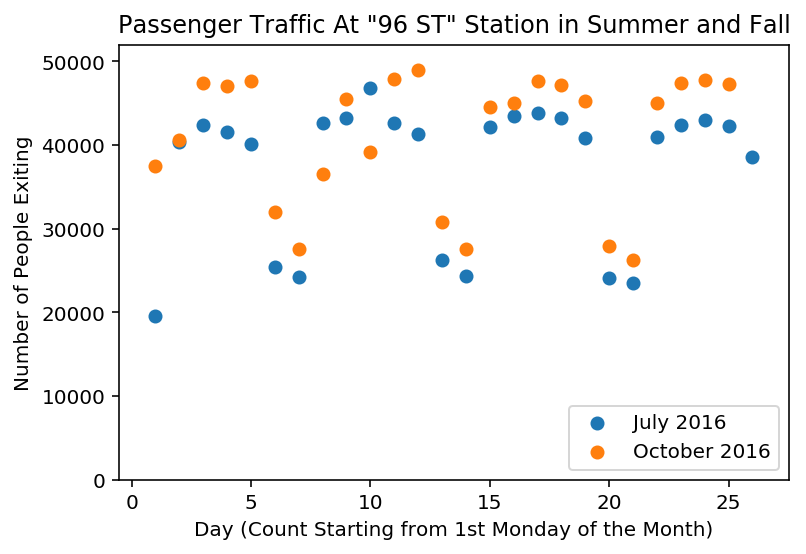

In [48]:
ExitStationP('96 ST', 52000)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

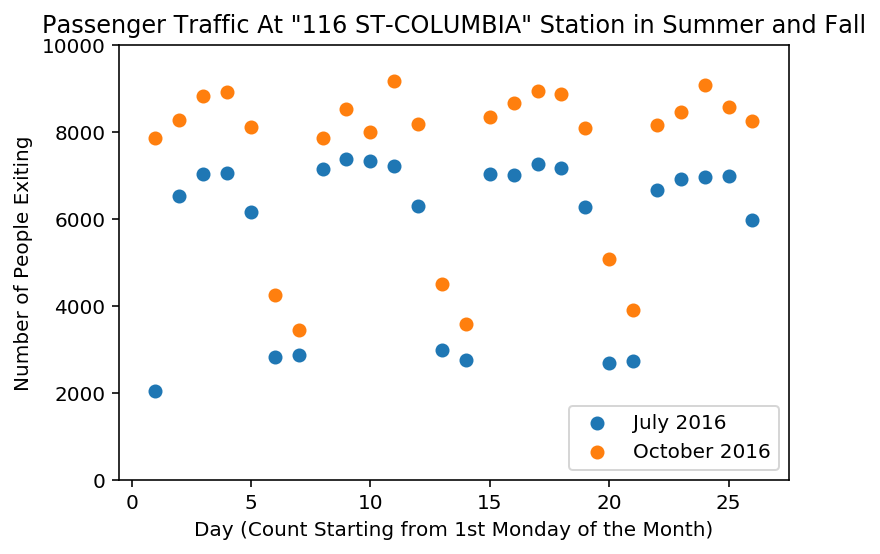

In [51]:
ExitStationP('116 ST-COLUMBIA', 10000)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

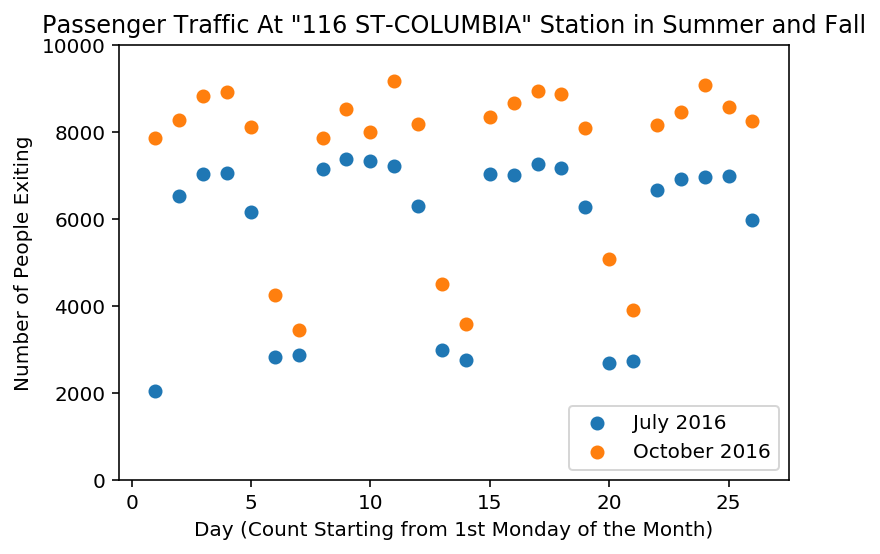

In [58]:
ExitStationP('116 ST-COLUMBIA', 10000)

In [61]:
C = ChooseTurnstile('116 ST-COLUMBIA')
summerC, fallC = ExitStation(C)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [62]:
Cc = ChooseTurnstile('116 ST')
summerCc, fallCc = ExitStation(Cc)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [70]:
%matplotlib notebook
#plt.ion()

<IPython.core.display.Javascript object>


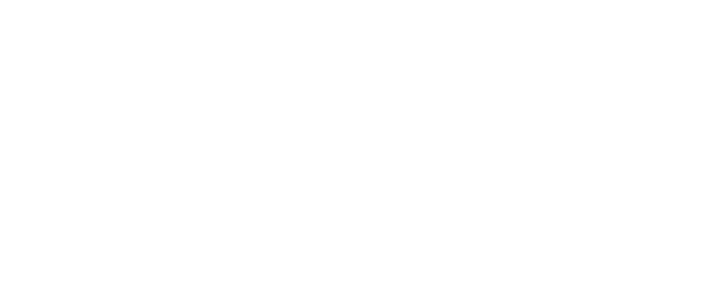

AttributeError: 'AxesSubplot' object has no attribute 'plt'

<IPython.core.display.Javascript object>


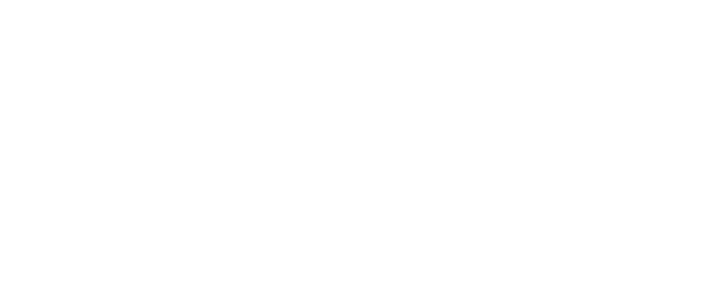

In [71]:
#Columbia
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plt.scatter(summerC['day'], summerC['summer exits'])
ax[0].plt.scatter(fallC['day'], fallC['fall exits'])
ax[0].plt.ylim(0, yaxisV)
ax[0].plt.xlabel('Day (Count Starting from 1st Monday of the Month)')
ax[0].plt.ylabel('Number of People Exiting')
ax[0].plt.title('Passenger Traffic At "{0:s}" Station in Summer and Fall'.format('116 ST-COLUMBIA'))
ax[0].plt.legend(('July 2016', 'October 2016'), loc = 'lower right')

ax[1].plt.scatter(summerCc['day'], summerCc['summer exits'])
ax[1].plt.scatter(fallCc['day'], fallCc['fall exits'])
ax[1].plt.ylim(0, yaxisV)
ax[1].plt.xlabel('Day (Count Starting from 1st Monday of the Month)')
ax[1].plt.ylabel('Number of People Exiting')
ax[1].plt.title('Passenger Traffic At "{0:s}" Station in Summer and Fall'.format('116 ST'))
ax[1].plt.legend(('July 2016', 'October 2016'), loc = 'lower right')
plt.show()